<a href="https://colab.research.google.com/github/Datanerd97/PyTorch/blob/main/extras/exercises/01_pytorch_workflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. PyTorch Workflow Exercise Template

The following is a template for the PyTorch workflow exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [42]:
# Import necessary libraries
import torch
import matplotlib.pyplot as plt
import numpy as np

In [43]:
# Setup device-agnostic code
device = 'cuda' if torch.cuda.is_available else "cpu"

device

'cuda'

## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [44]:
# Create the data parameters
weight = 0.3
bias = 0.9
start = 0
step = 0.01
end = 1
# Make X and y using linear regression feature
X = torch.arange(start,end,step).unsqueeze(dim = 1) # We unsqueeze it for when we do our models..

# y is the linear regression output
y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[0.9000],
        [0.9030],
        [0.9060],
        [0.9090],
        [0.9120],
        [0.9150],
        [0.9180],
        [0.9210],
        [0.9240],
        [0.9270]])


In [45]:
# Split the data into training and testing
train_split = int(0.8 * len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)


(80, 80, 20, 20)

In [46]:
# Plot the training and testing data
def plot_predictions(train_data = X_train,train_labels = y_train,test_data = X_test,test_labels = y_test,predictions = None):

  # Plot the training and testing data
  plt.figure(figsize = (10,10))

  # Plot the training data

  plt.scatter(train_data,train_labels,s = 3.5,color = "blue",label = "Training Data")

  # Plot the test data as well

  plt.scatter(test_data,test_labels,s = 3.5,color = "green",label = "Test Data")


  if predictions is not None:
    plt.scatter(test_data,predictions,s = 3.5,color = "red",label = "Predictions")

  plt.title('Training and Testing Data')

  plt.show()

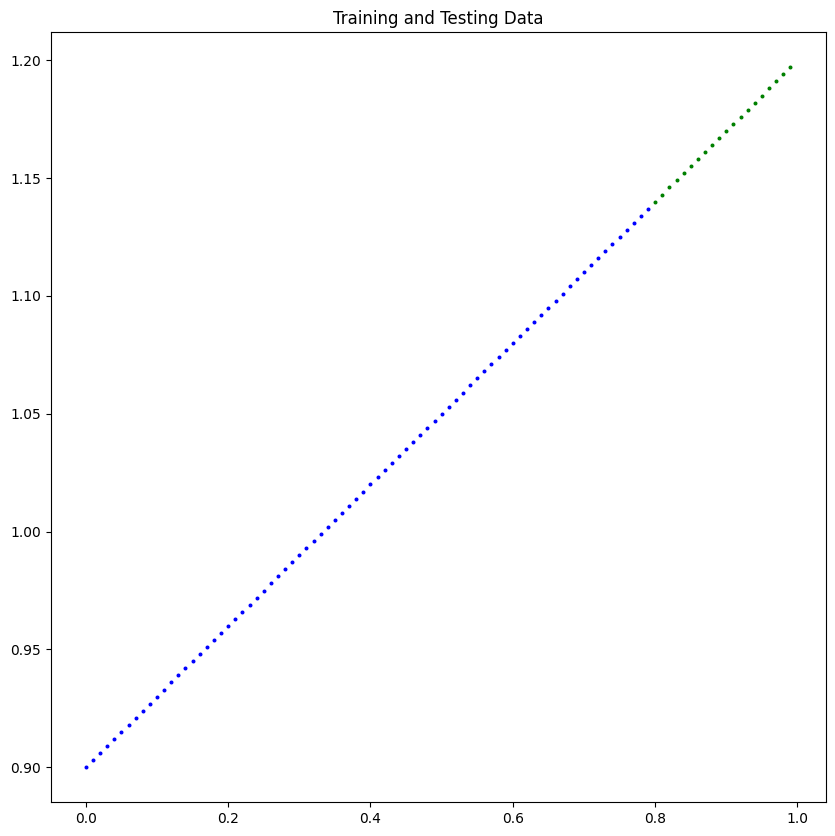

In [47]:
plot_predictions()

## 2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [49]:
# Create PyTorch linear regression model by subclassing nn.Module
from torch import nn

class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()

    # Initalize The Model Parameters to be used in various computations

    # For self.weights we make random inital values and set requires_grad equals True for gradient descent and pytorch loves default value of float32
    # Bias we make random inital values for bias

    self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype = torch.float))

    self.bias = nn.Parameter(torch.randn(1,requires_grad = True,dtype = torch.float))

    # Forward is what defines the computation required for the model
    # We define a forward method where the inside is a tensor and the output is a Tensor
  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias # Return the Linear Regression Model





The whole goal of our model is to start with random numbers i.e random parameters (weights, and bias) and to look at the data and update those random numbers to represent the pattern here

If it runs correctly will take our weight and our bias and run it through the forward calculation which is the same formula we use to run our data and it will adjust the weight and bias to represent as close as possible the known parameters

In [50]:
# Instantiate the model and put it to the target device


# Create A random_seed
torch.manual_seed(45)

# Create our first model_0
model_0 = LinearRegression()

list(model_0.parameters())


[Parameter containing:
 tensor([-1.1224], requires_grad=True),
 Parameter containing:
 tensor([0.0312], requires_grad=True)]

In [51]:
# List named parameters

model_0.state_dict()

OrderedDict([('weights', tensor([-1.1224])), ('bias', tensor([0.0312]))])

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [52]:
# Create the loss function and optimizer

# Set up our loss function
loss_fn = nn.L1Loss()

# Optimizer
optimizer = torch.optim.SGD(model_0.parameters(),lr = 0.01)

In [53]:
# Training loop


# Train model for 300 epochs
epochs = 300

# Send data to target device

for epoch in range(epochs):
  ### Training

  # Put model in train mode
  model_0.train()  # training mode in PyTorch sets all parameters that requires gradient to use gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate loss
  loss = loss_fn(y_pred,y_train)

  # 3. Zero gradients
  optimizer.zero_grad()

  # 4. Backpropagation, perform backpropagation on the loss wrt the parameters of the model
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

    # Put model in evaluation mode and setup inference context
    model_0.eval()
      # 1. Forward pass
    with torch.inference_mode():
      test_pred = model_0(X_test)
      # 2. Calculate test loss
      test_loss = loss_fn(test_pred,y_test)
      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 1.431 | Test loss: 2.128
Epoch: 20 | Train loss: 1.199 | Test loss: 1.858
Epoch: 40 | Train loss: 0.968 | Test loss: 1.587
Epoch: 60 | Train loss: 0.737 | Test loss: 1.316
Epoch: 80 | Train loss: 0.506 | Test loss: 1.045
Epoch: 100 | Train loss: 0.311 | Test loss: 0.797
Epoch: 120 | Train loss: 0.222 | Test loss: 0.626
Epoch: 140 | Train loss: 0.186 | Test loss: 0.515
Epoch: 160 | Train loss: 0.170 | Test loss: 0.445
Epoch: 180 | Train loss: 0.161 | Test loss: 0.401
Epoch: 200 | Train loss: 0.153 | Test loss: 0.370
Epoch: 220 | Train loss: 0.146 | Test loss: 0.348
Epoch: 240 | Train loss: 0.139 | Test loss: 0.329
Epoch: 260 | Train loss: 0.133 | Test loss: 0.313
Epoch: 280 | Train loss: 0.126 | Test loss: 0.297


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [57]:
# Make predictions with the model
model_0.eval()

with torch.inference_mode():
  y_predv1 = model_0(X_test)
y_predv1

tensor([[0.9152],
        [0.9123],
        [0.9093],
        [0.9064],
        [0.9035],
        [0.9006],
        [0.8977],
        [0.8947],
        [0.8918],
        [0.8889],
        [0.8860],
        [0.8830],
        [0.8801],
        [0.8772],
        [0.8743],
        [0.8714],
        [0.8684],
        [0.8655],
        [0.8626],
        [0.8597]])

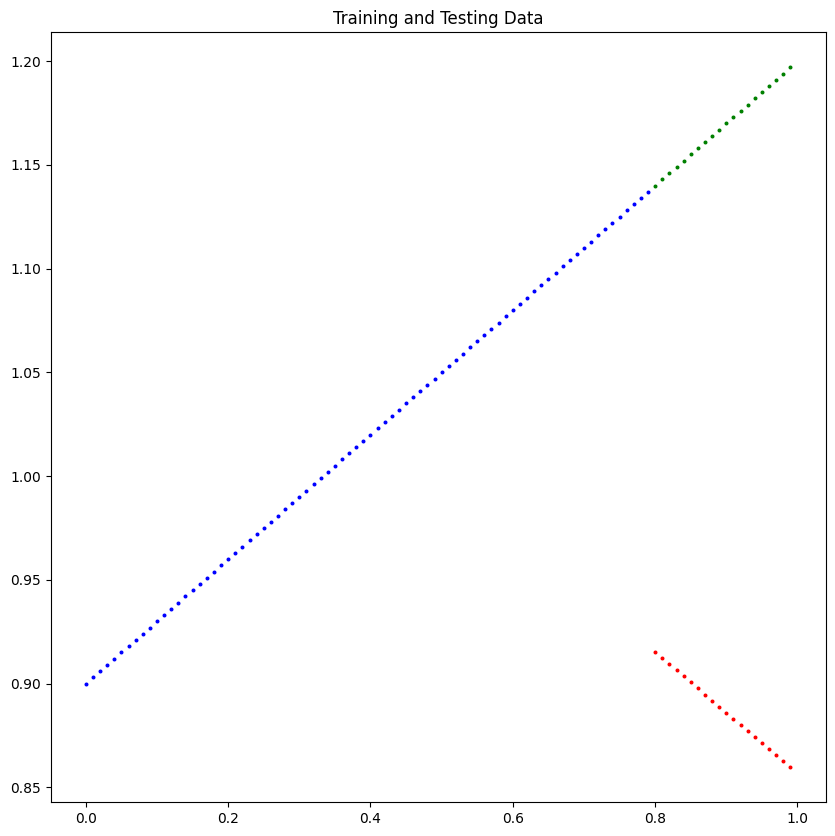

In [59]:
# Plot the predictions (these may need to be on a specific device)
plot_predictions(predictions = y_predv1)

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [ ]:
from pathlib import Path

# 1. Create models directory


# 2. Create model save path

# 3. Save the model state dict


In [ ]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)


In [ ]:
# Make predictions with loaded model and compare them to the previous
